In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.model_selection import train_test_split  # dividing data into groups
from operator import itemgetter  # get each rows from pandas data type
from sklearn.metrics import confusion_matrix
import math
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



Metoda do wczytwyania z pliku konkretnych klas i cech

In [2]:
def _prepare_data(path_to_csv,class_list,feature_list):
        """import data"""
        df = pd.read_csv(path_to_csv, header=None)
        """choose class"""
        k = df[(df[0].isin(class_list))]
        """return class with specific features"""
        return k[feature_list]

Wybranie klas o numerach 3, 5, 8, 11.

Tutaj można także wpisać numery cech(0 to nazwa klasy)

In [3]:
data = _prepare_data(path_to_csv="leaf.csv",class_list = [3,5,8,11],
                                            feature_list = [0,2,4])

Podział danych na treningowe i testowe

In [4]:
train, test = train_test_split(
            data.copy(), test_size=0.2, random_state=111)

Wyświetlenie macierzy kowiariancji

In [5]:
train.corr()

,0,2,4
0,1.000000,-0.450049,0.628216
2,-0.450049,1.000000,0.389380
4,0.628216,0.389380,1.000000


In [6]:
train = np.array(train)

In [7]:
five = train[np.where(train[:,0] == 5)]
five = five[:,[1,2]]

In [8]:
tree = train[np.where(train[:,0] == 3)]
tree = tree[:,[1,2]]

In [9]:
eight = train[np.where(train[:,0] == 8)]
eight = eight[:,[1,2]]

In [10]:
eleven = train[np.where(train[:,0] == 11)]
eleven = eleven[:,[1,2]]

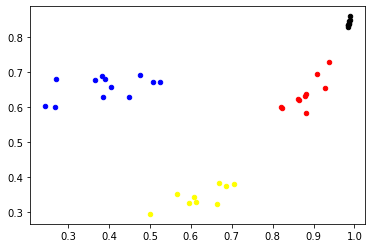

In [11]:

plt.scatter(five[:,[0]], five[:,[1]], s = 20, c = 'red')
plt.scatter(tree[:,[0]], tree[:,[1]], s = 20, c = 'yellow')
plt.scatter(eight[:,[0]], eight[:,[1]], s = 20, c = 'black')
plt.scatter(eleven[:,[0]], eleven[:,[1]], s = 20, c = 'blue')
plt.show()


Standaryzujemy dane

In [12]:
train = train[:,[1,2]]
scaler = StandardScaler()

train = scaler.fit_transform(train)

Wybieramy tylko cechy

Wyznaczamy optymalną liczbę modów, czyli przyjmujemy np. maksymalną liczbę skupień 8(wiecej nie potrzebujemy), iterujemy i sprawdzamy dla jakiej liczby skupień funkcja przestaje opadać

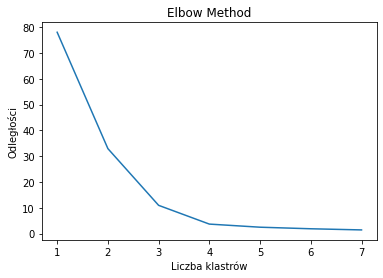

In [13]:
dist = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=8, random_state=0)
    kmeans.fit(train)
    dist.append(kmeans.inertia_)
plt.plot(range(1, 8), dist)

plt.title('Elbow Method')
plt.xlabel('Liczba klastrów')
plt.ylabel('Odległości')
plt.show()


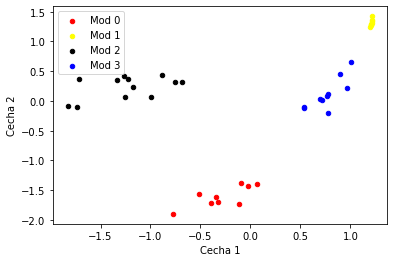

array([[-0.27765814, -1.60189882],
       [ 1.20853952,  1.31519305],
       [-1.23719796,  0.22888883],
       [ 0.76769826,  0.1148879 ]])

In [14]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=n_clusters, random_state=0)
y_kmeans = kmeans.fit_predict(train)

colors = ['red','yellow','black','blue']

for cluster in range(n_clusters):
    plt.scatter(train[y_kmeans == cluster, 0], train[y_kmeans == cluster, 1], s = 20, c = colors[cluster], label = 'Mod {}'.format(cluster))

plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')


plt.legend()


plt.show()
kmeans.cluster_centers_
